---

title: 理解 t 分布与假设检验
date: 2024-09-29
author: 郝鸿涛
slug: t
draft: false
toc: true
tags: 统计学

---

上次讲到[标准误和正态分布](/cn/2024/09/24/clt/) 时，我们的假设我们知道母体的均值 $\mu$ 和标准差 $\sigma$。那我们假设一下，当我们不知道母体标准差的时候下面这个问题如何回答？

>一本上古秘籍里写到天狼星人的智商服从正态分布 $\mathcal N(150, \sigma^2)$。方差具体数值因为年代太久，字迹变得模糊而不可知。突然有一天，联合国政府收到一封宇宙中传来的匿名电子邮件，专家破译后得知这封信警告地球，全部天狼星人已经伪装成地球人，到达了 A 国的 B 城市，并已经把该城市所有的地球人心智和灵魂转化成了天狼星人，他们企图之后全部控制地球。为了不引发大规模冲突，联合国政府在一个深夜从 B 城市中随机悄悄绑架了 20 个人。然后让他们进行智力测试，得出的结果是，这些人的智力均值为 $160$，方差为 $20^2$。假设 (1) 这个宇宙中只有地球人和天狼星人可以测智商、(2)地球人的平均智商和天狼星人的完全不同。请问：这些人到底是不是天狼星人？

我们不知道怎么解决。

像我们学习卡方分布时一样，我们暂时抛开这个问题，学一个概念：$t$ 分布。

## t 分布

我们从一个均值为 $\mu$、方差为 $\sigma^2$ 的正态分布 $\mathcal N(\mu, \sigma^2)$ 中随机取 $N$ 个[独立同分布](https://zh.wikipedia.org/wiki/%E7%8B%AC%E7%AB%8B%E5%90%8C%E5%88%86%E5%B8%83) (i.i.d) 的随机变量 $X_1, X_2, ... , X_N$。这些随机变量构成一个样本。该样本的均值为 $\bar{X}$、方差为 $S^2$。取无数个样本。

$t$ 分布的定义为：

$$T = \frac{\bar{X} - \mu}{\frac{S}{\sqrt{N}}}$$

我们知道 Z-score 的计算为：

$$Z = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{N}}} = \frac{(\bar{X} - \mu) \cdot \sqrt{N}}{\sigma}$$

在卡方分布的教程中我们提到：

$$\chi^2 = \frac{(N-1)S^2}{\sigma^2}\sim \chi_{N-1}^{2}$$

所以

$$S = \sqrt{\frac{\chi^2 \cdot \sigma^2}{N-1}}$$

继续推导

$$T = \frac{(\bar{X} - \mu) \cdot \sqrt{N}}{S} = \frac{Z \cdot \sigma}{\sigma \sqrt{\frac{\chi^2}{N-1}}} = \frac{Z}{\sqrt{\frac{\chi^2}{N-1}}}$$

我们知道

$Z \sim \mathcal N(0, 1)$

$\chi^2 \sim \chi_{N-1}^{2}$

所以 $t$ 分布本质上是标准正态分布随机变量和卡方分布随机变量的比值。


### t 分布的概率密度函数

统计学家算出了 $t$ 分布的概率密度函数:

$$
f(t) = \frac{\Gamma\left(\frac{N}{2}\right)}{\sqrt{N\pi} \, \Gamma\left(\frac{N-1}{2}\right)} \left(1 + \frac{t^2}{N-1}\right)^{-\frac{N}{2}}, \quad \text{for } t \in \mathbb{R}
$$

其中 $\Gamma(\cdot)$ 是 Gamma 函数，它的定义如下：

$$
\Gamma(n) = \int_0^{\infty} t^{n-1} e^{-t} \, dt
$$

对于正整数 \( n \)，有：

$$
\Gamma(n) = (n-1)!
$$

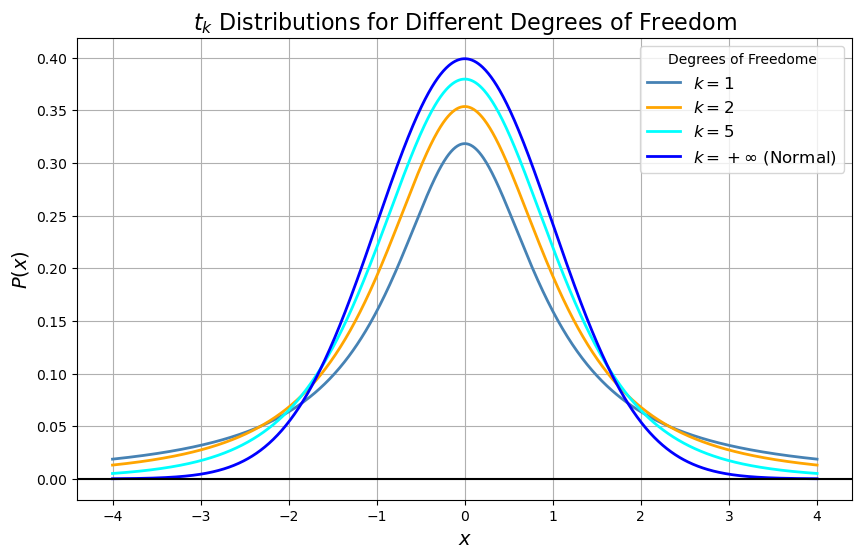

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import t

dfs = [1, 2, 5, np.inf]
x = np.linspace(-4, 4, 1000)  # Define the x-axis range
colors = ['steelblue', 'orange', 'cyan', 'blue']

plt.figure(figsize=(10, 6))

for df, color in zip(dfs, colors):
    if df == np.inf:
        plt.plot(x, t.pdf(x, df=df), color=color, lw=2, 
                 label=rf'$k= +\infty$ (Normal)')
    else:
        plt.plot(x, t.pdf(x, df=df), color=color, lw=2, 
            label=rf'$k={df}$')  # Plot PDF line

plt.axhline(0, color='black')
plt.xlabel(r'$x$', fontsize = 14)
plt.ylabel(r'$P(x)$', fontsize = 14)
plt.title(r'$t_k$ Distributions for Different Degrees of Freedom', fontsize = 16)
plt.legend(title = 'Degrees of Freedome', fontsize = 12)
plt.grid(True)

plt.show()

通过概率密度函数，以及上面 $T$ 的最终推导公式，我们可以知道

$$T \sim t_{N-1}$$

这是因为：

卡方分布的自由度为 $N-1$，$t$ 分布继承了这一点。

另外，$t$ 分布的概率密度函数中我们看到 $N$ 和 $N-1$，那自由度一定是比较小的那个。

## 假设检验

回到最初的题目。我们假设 B 城市确实所有人的都已经变成了天狼星人 ($H_0$)。如果 $H_0$ 成立，根据 $t$ 分布的定义，如果我们每次从 B 城市所有天狼星人中随机抽取 20 个人，算出样本平均值和方差。进行无数次抽样，每次算出 

$$T = \frac{\bar{X} - \mu}{\frac{S}{\sqrt{N}}}$$

我们知道

$T \sim t_{19}$

无数个 $T$ 的分布服从自由度为 $19$ 的 $t$ 分布：

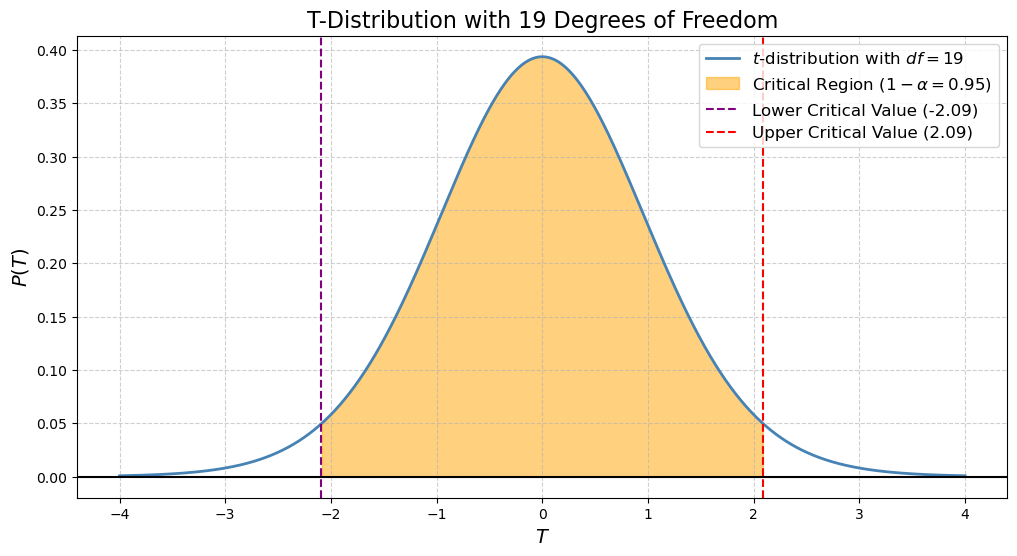

In [6]:
## params
df = 19
alpha = 0.05
x = np.linspace(-4, 4, 1000)

# calculate PDF for t-distribution
y = t.pdf(x, df=df)

# critical values for the given alpha level
q_value_upper = t.ppf(1 - alpha/2, df) 
q_value_lower = t.ppf(alpha/2, df)

# Plot the t-distribution PDF
plt.figure(figsize=(12, 6))
plt.plot(x, y, color='steelblue', lw=2, 
    label=rf'$t$-distribution with $df={df}$')  

# Fill the area between the critical values for the two-tailed region
plt.fill_between(x, y, 
                 where=np.logical_and(x <= q_value_upper, x >= q_value_lower), 
                 color='orange', 
                 alpha = 0.5, 
                 label=rf'Critical Region ($1 - \alpha = {1 - alpha:.2f}$)')
plt.axvline(q_value_lower, color="purple", 
            linestyle='--', 
            label=f'Lower Critical Value ({q_value_lower:.2f})')
plt.axvline(q_value_upper, color="red", 
            linestyle='--', 
            label=f'Upper Critical Value ({q_value_upper:.2f})')
plt.axhline(0, color = "black")
plt.xlabel(r'$T$', fontsize = 14)
plt.ylabel(r'$P(T)$', fontsize = 14)
plt.title(rf'T-Distribution with {df} Degrees of Freedom', fontsize = 16)
plt.grid(True, linestyle='--', alpha = 0.6)
plt.legend(fontsize = 12)
plt.show()

那我们如何判断我们随机抽的那 20 个人是否来自于天狼星人母体呢？就是根据上面的 $t$ 分布图。我们把这 20 个人智商的均值和方差带进 $T$ 的计算公式，可以得到对应的 $T$ 值。这个 $T$ 值有 $95\%$ 的概率落在橙色区域所对应的 $T$ 值中，也就是如果 $-2.09 \le T \le 2.09$，那这 20 人真的来自天狼星人母体的概率挺大的，我们无法否定 $H_0$。但是如果 $T \le -2.09$ 或者 $T \ge 2.09$，这个概率就小于等于 $5\%$，我们就可以否定 $H_0$。

In [3]:
N = 20
S = 20
X_bar = 160
mu = 150
T =(X_bar - mu)/(S/np.sqrt(N))
T

2.23606797749979

我们看到 $T = 2.24 \ge 2.09$。所以这 20 人是天狼星人的概率比较小，小于等于 $5\%$。

更具体算的话，当 $T \le -2.24$ 或者 $T \ge 2.24$ 时，这 20 人来自于天狼星母体的概率小于等于：

In [4]:
cdf_value = (1 - t.cdf(T, df))*2
cdf_value

0.03754054954852504

我们可以拒绝原假设 $H_0$，所以我们无法接受这个陈述：这 20 人是天狼星人。

正常情况下，拒绝 $H_0$ 并不意味着接受备择假设 $H_a$ (这 20 人不是天狼星人)，因为还可能有无数个不同的。但是就我们这道题目而言，能测智商的除了天狼星人就是地球人，而且这两个物种的智商分布完全不同。考虑到这两个条件，这 20 人不是天狼星人，就只能是地球人。所以说，这 20 人是天狼星人的概率很小，那他们是地球人的概率就很大。